# Wheat on a Chessboard

The Wheat and Chessboard problem requires one to determine how many total grains of wheat would be on a chessboard if one was to place one grain on the first square, two grains on the second square, four grains on the third square, and so on. You can read more about the Wheat and Chessboard problem on [this page on Wikipedia](https://en.wikipedia.org/wiki/Wheat_and_chessboard_problem). In this exercise, you will run code that solves this problem and analyze the results.

In [7]:
# Execute this cell via Shift+Enter so that we can make some plots
import matplotlib.pyplot as plt
%matplotlib inline

**Step 1**: Load the code in WheatChessboard.py in the cell below using the `%load` magic function.  After loading the code, execute the cell via <code>Shift+Enter</code>.  You'll see that the variable <code>wheat</code> contains a list of the number of grains on each square of the chessboard, since it starts with one initial grain, which doubles (compounds at a rate of 100% per square, or 1), and continues doubling for 63 more squares.  The variable <code>total_wheat</code> represents the total amount of wheat on the board, found by summing the list.

In [2]:
# %load WheatChessboard.py
def compound_by_period(balance, rate, num_periods):
    """
    Returns a list of balances by computing the compounded total,
    based on an initial balance and per-period interest rate over 
    the specified number of compounding periods
    
    balance: Initial amount
    rate: increase at each period (supply percentage in decimal form)
    num_periods: the number of periods to compound the balance
    """
    
    balances = [balance]
    for n in range(1,num_periods+1):
        balance = round( balance * (1 + rate), 2)
        balances.append(balance)
    return balances

# wheat: list containing the number of grains of wheat on each square of the chessboard

wheat = compound_by_period(1,1,63)

total_wheat = sum(wheat)


**Step 2**: The Matplotlib `pyplot` module has already been loaded as <code>plt</code> in the first cell of this notebook. In the code cell below, using the <code>plt.plot</code> function, plot the list that contains the number of grains on each square. Using the <code>plt.xlabel</code> and <code>plt.ylabel</code> functions, label the x-axis as "square on chessboard" and label the y-axis as "number of grains on square".  Both the <code>plt.xlabel</code> and <code>plt.ylabel</code> functions take a string argument and use that for the associated axis label. <br> In the resulting plot, note that the x-axis corresponds to the square number on the chessboard (from 0 to 63) and the y-axis corresponds to the number of grains on each square.  

## Graded Cell

This cell is worth 20% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: 
<br>
<img src="SessionStep2.png" width=400 height=400 align="left"/> 


Text(0, 0.5, 'number of grains on square')

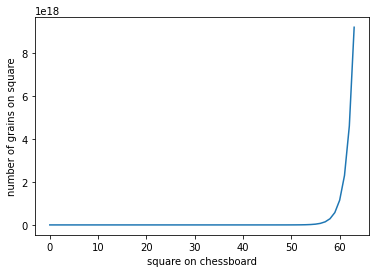

In [3]:
plt.plot(wheat)
plt.xlabel("square on chessboard")
plt.ylabel("number of grains on square")

**Step 3**: This plot is not super-informative because the number of grains grows so quickly over the last few squares of the chessboard.  (This is not unrelated to the "Second half of the chessboard" issue discussed on the Wikipedia page.)  Replot the wheat data in the cell below, but do so on a logarithmic scale.  This can be done by calling <code>plt.semilogy()</code> after you make the same plot as above, to make the y-axis logarithmic, leaving the x-axis linear.  A plot like this, with one axis linear and one axis logarithmic, is called a "semilog plot".  There is a function named <code>plt.semilogy</code> for making the y-axis logarithmic, and one named <code>plt.semilogx</code> for making the x-axis logarithmic. If you wanted to make both axes logarithmic (sometimes referred to as a "log-log plot"), you could call the function <code>plt.loglog</code>.  (Alternatively, instead of using the plotting functions to represent logarithmic data, you could compute directly the logarithm of the wheat data and plot it on a linear scale, by transforming it using an appropriate function in numpy <code>np</code>, e.g., <code>np.log2</code> or <code>np.log10</code>.)

## Graded Cell

This cell is worth 20% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="SessionStep3.png" width=400 height=400 align="left"/>

Text(0, 0.5, 'number of grains on square')

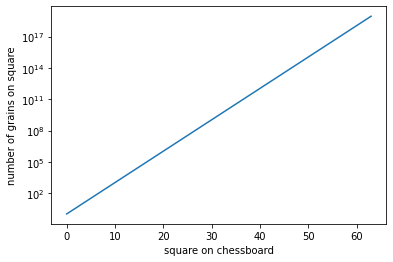

In [4]:
plt.semilogy(wheat)
plt.xlabel("square on chessboard")
plt.ylabel("number of grains on square")

### A little bit of math

From the plot above, we see that the logarithm of the number of wheat grains on each square, plotted against the index of a square on the board, forms a straight line.  Let $w$ be the number of wheat grains on each square, and $n$ be the square number.  We know that $w = 2^n$ for each square $n$, so we can take the logarithm of both sides of that equation to see that:

$$\log(w) = n * \log(2)$$

Therefore, the logarithm of the number of wheat grains on each square is proportional to $n$.  The growth of wheat on the chessboard is an exponential process: the amount on the next square is equal to the amount on the current square multiplied by a constant factor (in this case, a constant factor of 2).  

The word "exponential" is getting thrown around a lot these days in the media and on the web, often intending to suggest that something is "big" or "growing fast".  "Exponential" has a specific mathematical meaning, and you can use your data science skills to debunk claims that something is growing exponentially, when it in fact is not.  (More on this below.)

---

**Step 4**: Reference 1 in the Wheat and Chessboard Wikipedia page lists an article entitled "A Penny Doubled Every Day for 30 Days = $10.7M".  It turns out that \\$10.7M is an approximate total.  Using your <code>compound_by_period</code> function, compute exactly how much money you would have if you started with a penny (\\$0.01) and doubled it every day for 30 days.  Assign this total after 30 days to a variable named <code>total_after_30</code>.  

*Note*: this is a little bit different than the wheat and chessboard problem, because there the amount of wheat being placed on a square was doubled every day, but the total amount of wheat on the board is the cumulative sum over all squares up to the current one.  The penny-doubled-every-day problem is just a more conventional problem in compound interest, where the balance gets rolled over from day-to-day.

## Graded Cell

This cell is worth 10% of the grade for this assignment.

In [9]:
total_after_30 = compound_by_period(0.01,1,30)[-1]

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [10]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testTotalAfter30

try:  
    print(testTotalAfter30(total_after_30))
except Exception as e:
    print("Error!\n" + str(e))
    

Good work! 
(and don't spend all that hard-earned money in one place)


## Is this exponential?

We discussed above that the word "exponential" is sometimes used when it should not be.  Imagine that you are presented with a daily time series of data named <code>growth</code>, which contains 30 values over a 30-day time period.  How would you test whether the data you are given is approximately exponential?  In the cell below, we list the data, and then plot it.  It is growing really fast -- maybe it is exponential...

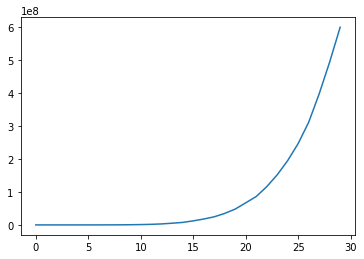

In [11]:
growth = [0.05, 2.5, 113.34, 984.31, 5082.98, \
          18981.26, 52366.83, 132330.2, 270299.59, \
          572061.32, 1059462.16, 1784434.76, 3031206.7, \
          5197773.29, 7575099.03, 12255624.49, 17800094.33, \
          24561420.03, 34785818.8, 47906857.92, 66781004.47, 85893594.16, \
          115653130.53, 151505384.45, 194695707.96, 246379722.3, 310701164.46, \
          396663884.62, 493109092.7, 598391193.23]

plt.plot(growth)

**Step 5**: We have a few different ways of assessing the claim that this is exponential growth: visually and mathematically.  Visually, a semilog plot of a quantity that is growing (or shrinking) exponentially should form approximately a straight line (as we saw above).  Replot the growth on a logarithmic y-axis and see whether that relationship holds true.

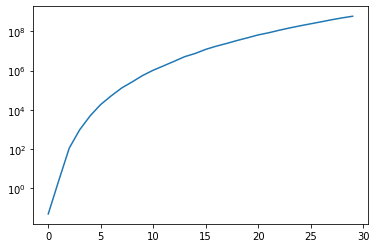

In [23]:
plt.plot(growth)
plt.yscale('log')

**Step 6**: Mathematically, the definition of an exponential sequence is one where each item is equal to the previous item times some constant factor.  We can test whether this relationship holds at least approximately by computing the ratio of successive elements in the data.

Create a new list called <code>ratios</code> where the i'th element of ratios is equal to the <code>growth[i+1]/growth[i]</code>.  Because you need to compute ratios from pairs of elements, the list ratios will have one fewer elements than the list growth.

## Graded Cell

This cell is worth 20% of the grade for this assignment.

In [24]:
ratios = []
for i in range(len(growth)):
    if i != 0:
        ratios.append(growth[i]/growth[i-1])
print(ratios)

[50.0, 45.336, 8.684577377801306, 5.1640032103707165, 3.734277923580262, 2.7588700644741184, 2.526985116341776, 2.0426145354575147, 2.116397290872694, 1.8520080329849955, 1.6842836180199208, 1.6986929239150217, 1.714753827246423, 1.4573738805756955, 1.6178830720844055, 1.4524020660492674, 1.3798477454473133, 1.4162788127686279, 1.3771950631790217, 1.393975880896177, 1.2861979965962618, 1.3464697997683603, 1.3099981276399608, 1.2850745118187779, 1.2654604710167439, 1.2610662986367038, 1.276673311828115, 1.2431408853175365, 1.2135067109663946]


## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [25]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testRatios

try:  
    print(testRatios(ratios, growth))
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


**Step 7**: Now that you've computed <code>ratios</code>, plot the values of the list.  If the data in <code>growth</code> were growing exponentially, <code>ratios</code> should be approximately constant, i.e., all of its values should be equal to one another.

## Graded Cell

This cell is worth 20% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="SessionStep7.png" width=400 height=400 align="left"/>

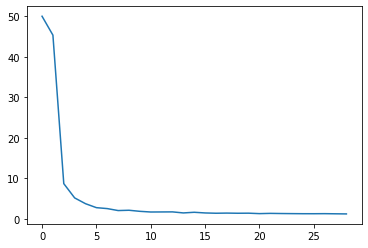

In [26]:
plt.plot(ratios)

## Do you think the data are growing exponentially?

In the code cell below, if you think the data are growing approximately exponentially, enter:

`ANSWER = True`

If you don't think that's the case, enter:

`ANSWER = False`

## Graded Cell

This cell is worth 10% of the grade for this assignment.

In [29]:
ANSWER = False

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [30]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testAnswer

try:  
    print(testAnswer(ANSWER))
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!
